# Prepare the Data

First, you will read in and clean several CSV files for analysis. The CSV files contain data on whale portfolio returns, algorithmic trading portfolio returns, and S&P TSX 60 historical prices. Use the Whale Analysis starter code to complete the following steps:

1. Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.

        whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

        algo_returns.csv: Contains returns from the in-house trading algorithms from your company.

        sp_tsx_history.csv: Contains historical closing prices of the S&P TSX 60 Index.

2. Identify and remove null values.

3. Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.

4. The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.

5. Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


### Import Library and Dependencies

In [1]:
## Import library and dependencies 

import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
from pathlib import Path 
import datetime as dt

### Using Pandas to read the CSV files into DataFrames & converting dates to a DateTimeIndex.

### Coding (Workings)





In [2]:
algo_path = Path(r"C:\Users\gokek\OneDrive\Desktop\FINTECH PROJECT\Starter_Code\Resources\algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(ascending=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [3]:
l_historical_path = Path(r"C:\Users\gokek\OneDrive\Desktop\FINTECH PROJECT\Starter_Code\Resources\l_historical.csv")
l_historical_df = pd.read_csv(l_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_historical_df.sort_index(ascending=True)


,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [4]:
otex_historical_path = Path(r"C:\Users\gokek\OneDrive\Desktop\FINTECH PROJECT\Starter_Code\Resources\otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_df.sort_index(ascending=True)

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [5]:
shop_historical_path = Path(r"C:\Users\gokek\OneDrive\Desktop\FINTECH PROJECT\Starter_Code\Resources\shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_df.sort_index(ascending=True)

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [6]:
sp_tsx_history_path = Path(r"C:\Users\gokek\OneDrive\Desktop\FINTECH PROJECT\Starter_Code\Resources\sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [7]:
whale_returns_path = Path(r"C:\Users\gokek\OneDrive\Desktop\FINTECH PROJECT\Starter_Code\Resources\whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Identifying and removing null values.

## algo

In [8]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [9]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


### l_historical


In [11]:
l_historical_df.dtypes

Symbol     object
Close     float64
dtype: object

In [12]:
l_historical_df.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [13]:
l_historical_df.dropna(inplace=True)
l_historical_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


## otex_historical

In [14]:
otex_historical_df.dtypes

Symbol     object
Close     float64
dtype: object

In [15]:
otex_historical_df.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [16]:
otex_historical_df.dropna(inplace=True)
otex_historical_df

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


## shop_historical

In [17]:
shop_historical_df.dtypes

Symbol     object
Close     float64
dtype: object

In [18]:
shop_historical_df.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [19]:
shop_historical_df.dropna(inplace=True)
shop_historical_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


## sp_tsx_history

In [20]:
# Check data types and change object to float
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [21]:
sp_tsx_history_df.isnull().sum()

Close    0
dtype: int64

In [22]:
sp_tsx_history_df.dropna(inplace=True)
sp_tsx_history_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


## whale_returns

In [23]:
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [24]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [25]:
whale_returns_df.dropna(inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


# Removing non-numeric values (e.g., dollar signs) from the DataFrames and converting the data types as needed


## sp_tsx_history

In [26]:
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].replace({"\$":""}, regex=True)
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].replace({"\,":""}, regex=True)
sp_tsx_history_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [402]:
sp_tsx_history_df.head()

,S&P TSX 60
Date,
2012-10-02,NaN
2012-10-03,-2.506943
2012-10-04,-3.784530
2012-10-05,-1.322942
2012-10-09,4.080375


In [28]:
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].astype(float)
sp_tsx_history_df.dtypes


Close    float64
dtype: object

In [29]:
sp_tsx_history_df=sp_tsx_history_df.pct_change()
sp_tsx_history_df.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [30]:
sp_tsx_history_df.isnull().sum()

Close    1
dtype: int64

In [31]:
sp_tsx_history_df.dropna(inplace=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [32]:
sp_tsx_history_df=sp_tsx_history_df.rename(columns = {"Close":"S&P TSX 60"})
sp_tsx_history_df.head()                                                      

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [33]:
combined_df = pd.concat([whale_returns_df, algo_df,sp_tsx_history_df], axis='columns', join ="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


## Performance Analysis

### 1. Calculate and plot daily returns of all portfolios.

### 2. Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P TSX 60?

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

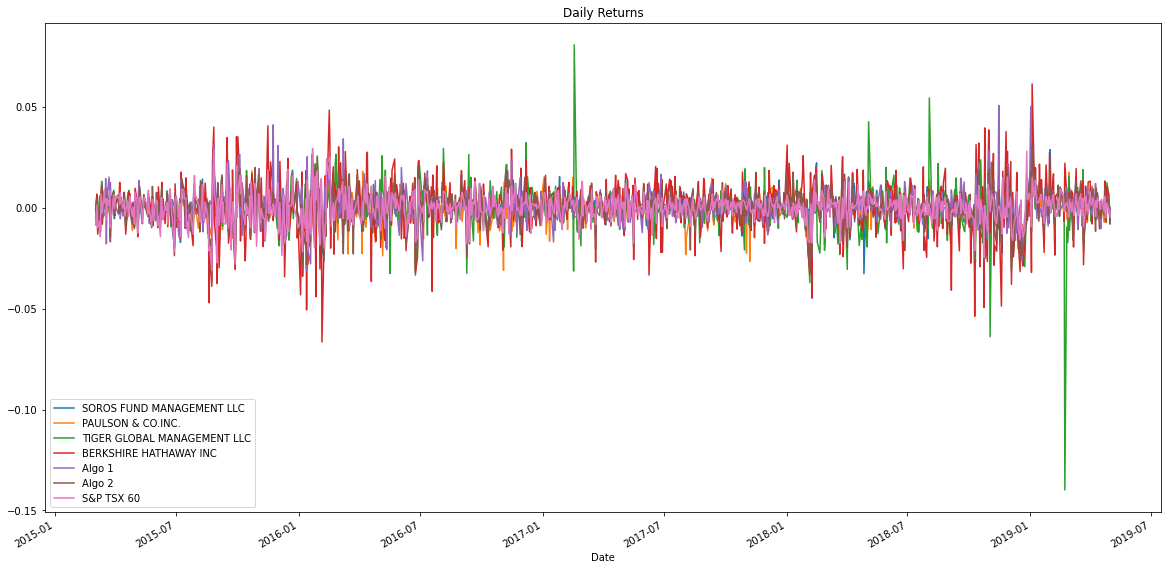

In [34]:
# Performance Analysis: Plotted Daily Returns
combined_df.plot(figsize=(20,10), title="Daily Returns")

<AxesSubplot:title={'center':'Calculated cumulative returns'}, xlabel='Date'>

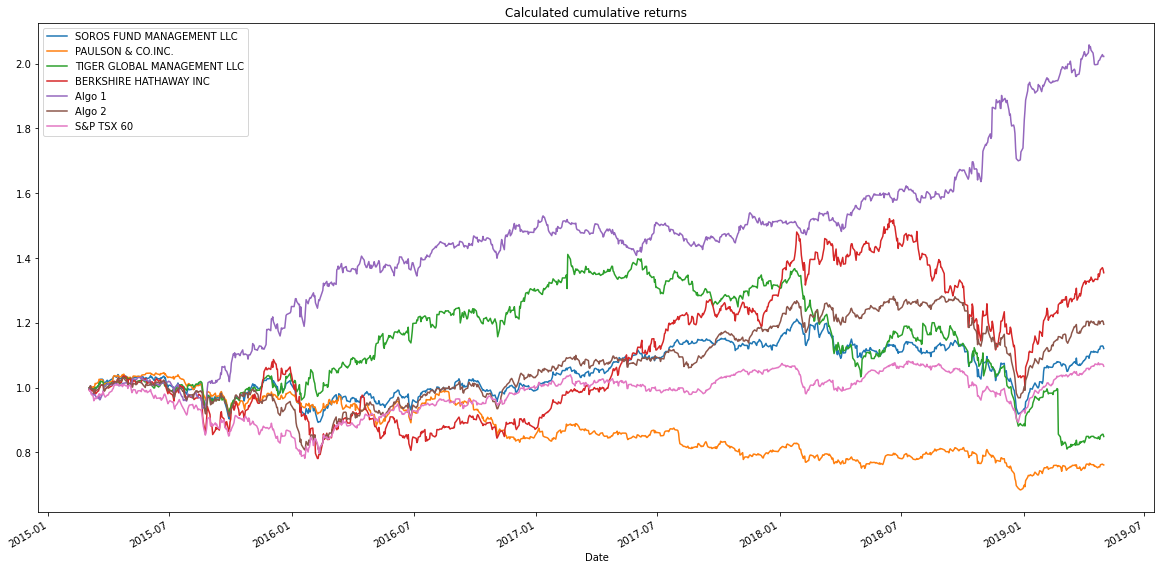

In [35]:
# Performance Analysis: Calculated and Plotted cumulative returns
cum_prod_df = (1 + combined_df).cumprod()
cum_prod_df.plot(figsize=(20,10), title="Calculated cumulative returns")

# Further Notes - Procedures employed

1. pull the csv and create a dataframe
2. format data (parsing, datetime format)
3. check dtypes and nulls
4. check for non-numeric values
5. run basic formatting calculations if you are concatinating multiple data sources
6. run calculations and carry out analysis while providing visualizations. 


## Risk Analysis

### 1. Create a box plot for each of the returns.

### 2. Calculate the standard deviation for each portfolio.

### 3. Determine which portfolios are riskier than the S&P TSX 60.

### 4. Calculate the annualised standard deviation.


In [36]:
combined_df = pd.concat([whale_returns_df, algo_df,sp_tsx_history_df], axis='columns', join ="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:>

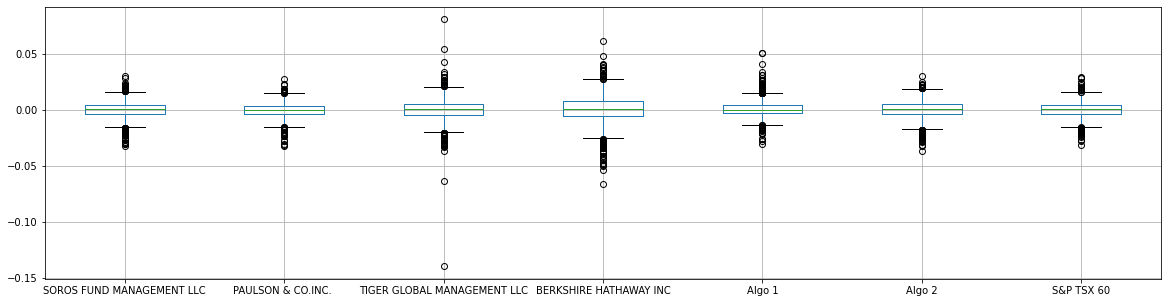

In [37]:
combined_df.boxplot(figsize=(20,5))

In [38]:
Std_dev_of_each_portfolio = combined_df.std()
print(Std_dev_of_each_portfolio)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64


In [39]:
Correlation = combined_df.corr()
Correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

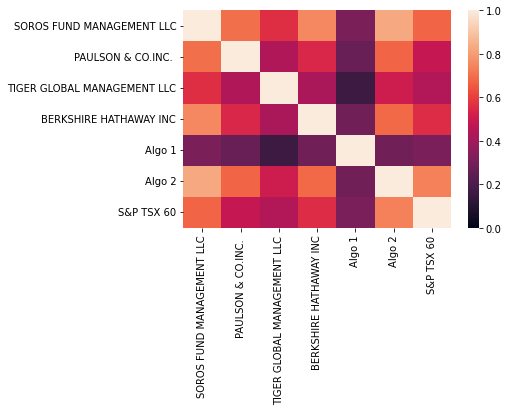

In [40]:
sns.heatmap(Correlation, vmin=0, vmax=1)

In [41]:
#Calculate the standard deviation for each portfolio.
combined_df_std = combined_df.std()
combined_df_std = combined_df_std.sort_values(ascending=False)
combined_df_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [42]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

<AxesSubplot:xlabel='Date'>

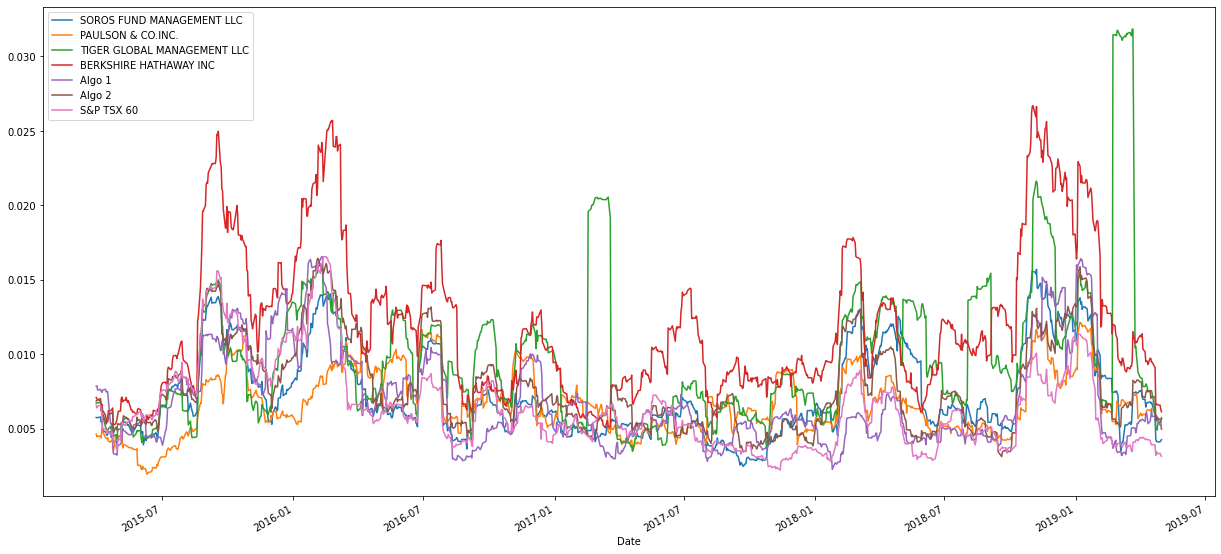

In [43]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
combined_df.rolling(window=21).std().plot(figsize=(21,10))

In [44]:
# Calculate the correlation of closing prices between portfolios
price_correlation = combined_df.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

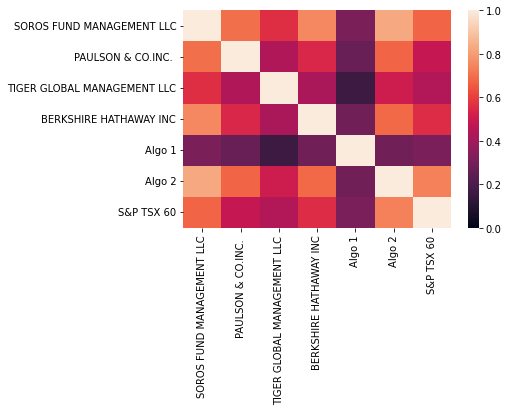

In [45]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=0, vmax=1)

# Choose one portfolio, then calculate and plot its beta as compared to the S&P TSX 60
algo_1 =combined_df
algo_1.drop(columns=[‘SOROS FUND MANAGEMENT LLC’,‘PAULSON & CO.INC.’,’TIGER GLOBAL MANAGEMENT LLC’,‘BERKSHIRE HATHAWAY INC’,‘Algo 2’])

# Calculating 60 days rolling Covariance between Algo 1 and S&P TSX 60
### Further Notes
rolling_covariance = algo_1[‘HAROLD ALGO 1’].rolling(window=60).cov(algo_1[‘S&P TSX 60’])
#rolling_covariance.plot(figsize=(20, 10), title=‘Rolling 60-Day Covariance of Harolds Algo 1 Returns vs. S&P TSX 60 Returns’)
#Calulating 60 days rolling varinace of S&P TSX 60
rolling_variance = algo_1[‘S&P TSX 60’].rolling(window=60).var()
#Calculating 60 days rolling beta for Algo 1 vs S&P TSX 60
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title=‘Rolling 60-Day Beta of Harolds Algo_1’)

In [47]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [57]:
# Choose one portfolio, then calculate and plot its beta as compared to the S&P TSX 60
combined_df
#Algo_1
#Algo_1.drop(columns = ['SOROS FUND MANAGEMENT LLC','PAULSON &CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 2'],axis=1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [254]:
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [262]:
#whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [267]:
#Two or more Data Frames can be concatinated. A concatenation of two or more data frames 
#can be done using pandas.concat() method. concat() in pandas works by combining Data Frames across rows or columns. 
#We can concat two or more data frames either along rows  (axis=0) or along columns (axis=1)

#axis : {0, 1, …}, default 0. The axis to concatenate along.
#join : {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). 
#Outer for union and inner for intersection.

combined_df = pd.concat([whale_returns_df, algo_df,sp_tsx_history_df], axis='columns', join ="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-5.373833
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.604848
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,-1.398717
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-8.420220
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.342692


In [300]:
#To get the columns from C to E (note that unlike integer slicing, E is included in the columns):
#df.loc[:, 'C':'E']
Algo_1 = combined_df.loc[:, 'Algo 1':'S&P TSX 60']
Algo_1

,Algo 1,S&P TSX 60
Date,,
2015-03-03,-0.001942,-5.373833
2015-03-04,-0.008589,-0.604848
2015-03-05,-0.000955,-1.398717
2015-03-06,-0.004957,-8.420220
2015-03-09,-0.005447,-0.342692
...,...,...
2019-04-25,0.000682,-0.873648
2019-04-26,0.002981,-4.587667
2019-04-29,0.005208,-1.349587


In [299]:
#ssuming your column names (df.columns) are ['index','a','b','c'], then the data you want is in the third and fourth columns. I
#If you don't know their names when your script runs, you can do this
#newdf = df[df.columns[2:4]]
Algo_1 = combined_df[combined_df.columns[1:3]]
Algo_1

,Algo 1,S&P TSX 60
Date,,
2015-03-03,-0.001942,-5.373833
2015-03-04,-0.008589,-0.604848
2015-03-05,-0.000955,-1.398717
2015-03-06,-0.004957,-8.420220
2015-03-09,-0.005447,-0.342692
...,...,...
2019-04-25,0.000682,-0.873648
2019-04-26,0.002981,-4.587667
2019-04-29,0.005208,-1.349587


In [301]:
Algo_1 = combined_df.loc[:, 'Algo 1':'S&P TSX 60']
Algo_1

,Algo 1,S&P TSX 60
Date,,
2015-03-03,-0.001942,-5.373833
2015-03-04,-0.008589,-0.604848
2015-03-05,-0.000955,-1.398717
2015-03-06,-0.004957,-8.420220
2015-03-09,-0.005447,-0.342692
...,...,...
2019-04-25,0.000682,-0.873648
2019-04-26,0.002981,-4.587667
2019-04-29,0.005208,-1.349587


In [ ]:
#COVARIANCE

#Covariance provides insight into how two variables are related to one another. 
#More precisely, covariance refers to the measure of how two random variables in a data set will change together.
#A positive covariance means that the two variables at hand are positively related,and they move in the same direction.

In [572]:
# Calculating 60 days rolling Covariance between Algo 1 and S&P TSX 60
rolling_covariance = Algo_1['Algo 1'].rolling(window=60).cov(Algo_1['S&P TSX 60'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25   -0.004281
2019-04-26   -0.004442
2019-04-29   -0.004344
2019-04-30   -0.004445
2019-05-01   -0.004150
Length: 1029, dtype: float64

In [570]:
#rolling_covariance.plot(figsize=(20, 10), title=‘Rolling 60-Day Covariance of Harolds Algo 1 Returns vs. S&P TSX 60 Returns’)
#Calulating 60 days rolling varinace of S&P TSX 60
rolling_variance = Algo_1['S&P TSX 60'].rolling(window=60).var()
rolling_variance

Date
2015-03-03          NaN
2015-03-04          NaN
2015-03-05          NaN
2015-03-06          NaN
2015-03-09          NaN
                ...    
2019-04-25    18.702180
2019-04-26    18.890970
2019-04-29    18.749664
2019-04-30    18.801703
2019-05-01    18.983671
Name: S&P TSX 60, Length: 1029, dtype: float64

In [571]:
rolling_variance.tail()

Date
2019-04-25    18.702180
2019-04-26    18.890970
2019-04-29    18.749664
2019-04-30    18.801703
2019-05-01    18.983671
Name: S&P TSX 60, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Harold Algo_1'}, xlabel='Date'>

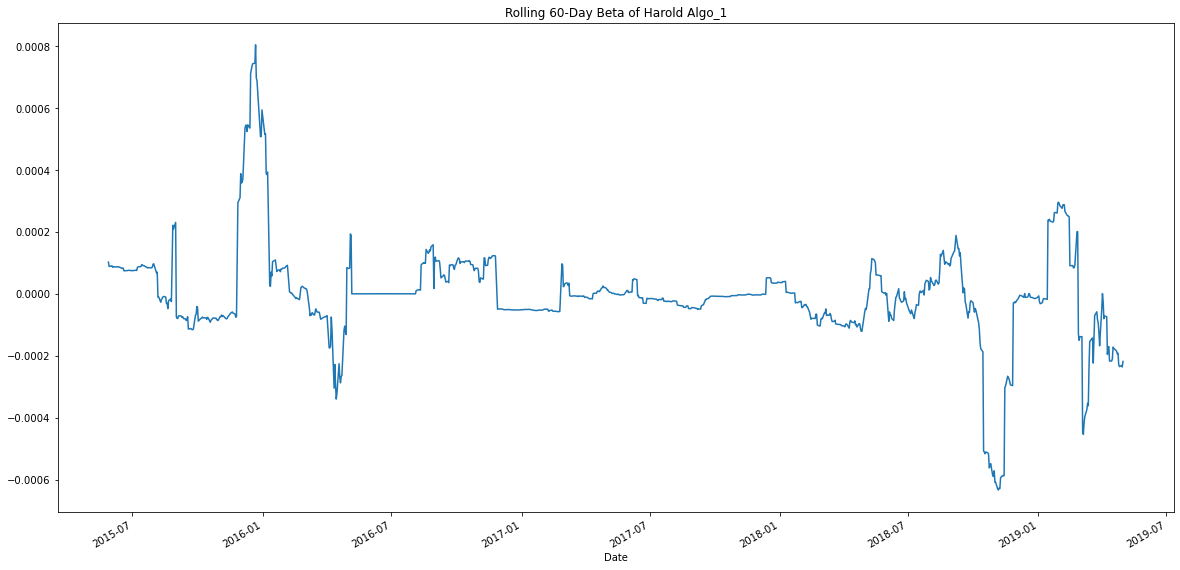

In [407]:
#Calculating 60 days rolling beta for Algo 1 vs S&P TSX 60
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Harold Algo_1')

In [504]:
# The Sharpe ratio is a measure of return often used to compare the performance of investment managers by making an 
# adjustment for risk. Generally speaking, a Sharpe ratio between 1 and 2 is considered good. 
# A ratio between 2 and 3 is very good, and any result higher than 3 is excellent.

# Calculate sharpe ratio
# Refer to markdown for Analysis of Sharp Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df_std * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                        NaN
Algo 2                        NaN
BERKSHIRE HATHAWAY INC        NaN
CP                            NaN
PAULSON & CO.INC.             NaN
S&P TSX 60                    NaN
SOROS FUND MANAGEMENT LLC     NaN
SP60                          NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

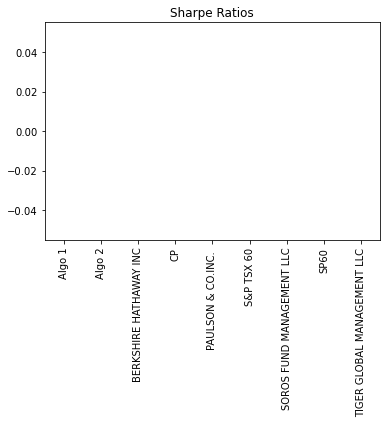

In [505]:
# This gives an impression of how volatile the portfolio is. The more data is centered around 0.0, 
#the less volatile and risky.

# Plot sharpe ratios using a bar chart
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [ ]:
Algo 1 is outperforming the S&P TSX60 by 125%(150-25%) - outperforming the market benchmark.

### Create a Custom Portfolio

Harold is ecstatic that you were able to help him prove that the algorithmic trading portfolios are doing so well compared to the market and whales portfolios. However, now you are wondering whether you can choose your own portfolio that performs just as well as the algorithmic portfolios. Investigate by doing the following:


Visit Google Sheets and use the built-in Google Finance function to choose 3-5 stocks for your portfolio.


Download the data as CSV files and calculate the portfolio returns.


Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.


Add your portfolio returns to the DataFrame with the other portfolios.


Run the following analyses:

Calculate the Annualized Standard Deviation.
Calculate and plot rolling std with a 21-day window.
Calculate and plot the correlation.
Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.
Calculate the Sharpe ratios and generate a bar plot.



How does your portfolio do?

In [ ]:
## Import library and dependencies 

import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
from pathlib import Path 
import datetime as dt

## Using Pandas to read the CSV files into DataFrames & converting dates to a DateTimeIndex.

### Coding (Workings)¶


In [413]:
### The three stocks chosen for my Portfolio are Tesla Inc (TSLA • NASDAQ), Alphabet Inc Class C (GOOG • NASDAQ) AND
### Walt Disney Co (DIS • NYSE).

In [412]:
tsla_path = Path(r"C:\Users\gokek\OneDrive\Desktop\custom_portfolio\tsla_google_finance.csv")
tsla_df = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.sort_index(ascending=True)

,Close
Date,
2015-05-21,3.13
2015-05-22,3.49
2015-05-25,3.73
2015-05-26,3.69
2015-05-27,3.45
...,...
2019-12-20,51.32
2019-12-23,51.16
2019-12-24,52.54


In [200]:
tsla_df.tail()

,Close
Date,
2019-12-20,51.32
2019-12-23,51.16
2019-12-24,52.54
2019-12-27,53.48
2019-12-30,51.78


In [201]:
goog_path = Path(r"C:\Users\gokek\OneDrive\Desktop\custom_portfolio\goog_google_finance.csv")
goog_df = pd.read_csv(goog_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(ascending=True)

,goog_price
Date,
2015-01-02,26.17
2015-01-05,25.62
2015-01-06,25.03
2015-01-07,24.99
2015-01-08,25.07
...,...
2019-12-23,67.44
2019-12-24,67.18
2019-12-26,68.02


In [202]:
dis_path = Path(r"C:\Users\gokek\OneDrive\Desktop\custom_portfolio\dis_google_finance.csv")
dis_df = pd.read_csv(dis_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
dis_df.sort_index(ascending=True)

,dis_price
Date,
2015-01-02,93.75
2015-01-05,92.38
2015-01-06,91.89
2015-01-07,92.83
2015-01-08,93.79
...,...
2019-12-23,144.68
2019-12-24,145.29
2019-12-26,145.70


## Identifying and removing null values.

In [203]:
tsla_df.dtypes

Close    float64
dtype: object

In [204]:
tsla_df.isnull().sum()

Close    0
dtype: int64

In [205]:
tsla_df.dropna(inplace=True)
tsla_df

,Close
Date,
2015-05-21,3.13
2015-05-22,3.49
2015-05-25,3.73
2015-05-26,3.69
2015-05-27,3.45
...,...
2019-12-20,51.32
2019-12-23,51.16
2019-12-24,52.54


In [206]:
goog_df.dtypes

goog_price    float64
dtype: object

In [207]:
goog_df.isnull().sum()

goog_price    0
dtype: int64

In [208]:
goog_df.dropna(inplace=True)
goog_df

,goog_price
Date,
2015-01-02,26.17
2015-01-05,25.62
2015-01-06,25.03
2015-01-07,24.99
2015-01-08,25.07
...,...
2019-12-23,67.44
2019-12-24,67.18
2019-12-26,68.02


In [213]:
dis_df.dtypes

dis_price    float64
dtype: object

In [214]:
dis_df.isnull().sum()

dis_price    0
dtype: int64

In [215]:
dis_df.dropna(inplace=True)
dis_df

,dis_price
Date,
2015-01-02,93.75
2015-01-05,92.38
2015-01-06,91.89
2015-01-07,92.83
2015-01-08,93.79
...,...
2019-12-23,144.68
2019-12-24,145.29
2019-12-26,145.70


## Removing non-numeric values (e.g., dollar signs) from the DataFrames and converting the data types as needed¶

In [216]:
tsla_df["Close"]=tsla_df["Close"].replace({"\$":""}, regex=True)
tsla_df["Close"]=tsla_df["Close"].replace({"\,":""}, regex=True)
tsla_df.sort_index(ascending=True)

,Close
Date,
2015-05-21,3.13
2015-05-22,3.49
2015-05-25,3.73
2015-05-26,3.69
2015-05-27,3.45
...,...
2019-12-20,51.32
2019-12-23,51.16
2019-12-24,52.54


In [217]:
tsla_df["Close"]=tsla_df["Close"].astype(float)
tsla_df.dtypes


Close    float64
dtype: object

In [218]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
tsla_df=tsla_df.pct_change()
tsla_df.head()

,Close
Date,
2015-05-21,NaN
2015-05-22,0.115016
2015-05-25,0.068768
2015-05-26,-0.010724
2015-05-27,-0.065041


In [219]:
tsla_df.dropna(inplace=True)
tsla_df.head()

,Close
Date,
2015-05-22,0.115016
2015-05-25,0.068768
2015-05-26,-0.010724
2015-05-27,-0.065041
2015-05-28,-0.014493


In [220]:
# Rename the columns to match the corresponding stock
tsla_df=tsla_df.rename(columns = {"Close":"tsla_price"})
tsla_df.head()  

,tsla_price
Date,
2015-05-22,0.115016
2015-05-25,0.068768
2015-05-26,-0.010724
2015-05-27,-0.065041
2015-05-28,-0.014493


<AxesSubplot:xlabel='Date'>

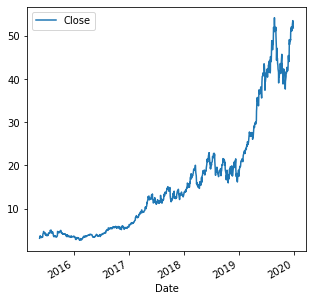

In [415]:
# Plot the daily returns of "dis" over the last 10 years
tsla_df.plot(figsize=(5,5))

In [235]:
goog_df=goog_df.replace({"\$":""}, regex=True)
goog_df=goog_df.replace({"\,":""}, regex=True)
goog_df.sort_index(ascending=True)

,goog_price
Date,
2015-01-02,NaN
2015-01-05,-0.021016
2015-01-06,-0.023029
2015-01-07,-0.001598
2015-01-08,0.003201
...,...
2019-12-23,-0.000593
2019-12-24,-0.003855
2019-12-26,0.012504


In [236]:
goog_df=goog_df.astype(float)
goog_df.dtypes


goog_price    float64
dtype: object

In [234]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
goog_df=goog_df.pct_change()
goog_df.head()

,goog_price
Date,
2015-01-02,NaN
2015-01-05,-0.021016
2015-01-06,-0.023029
2015-01-07,-0.001598
2015-01-08,0.003201


In [237]:
goog_df.dropna(inplace=True)
goog_df.head()

,goog_price
Date,
2015-01-05,-0.021016
2015-01-06,-0.023029
2015-01-07,-0.001598
2015-01-08,0.003201
2015-01-09,-0.013163


<AxesSubplot:xlabel='Date'>

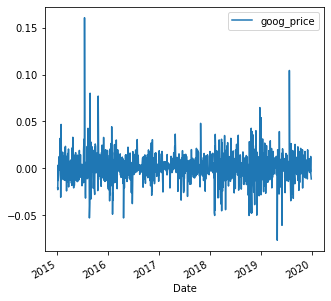

In [414]:
# Plot the daily returns of "dis" over the last 10 years
goog_df.plot(figsize=(5,5))

In [238]:
#goog_df=goog_df.rename(columns = {"Close":"goog_price"})
goog_df.head()  

,goog_price
Date,
2015-01-05,-0.021016
2015-01-06,-0.023029
2015-01-07,-0.001598
2015-01-08,0.003201
2015-01-09,-0.013163


In [226]:
dis_df=dis_df.replace({"\$":""}, regex=True)
dis_df=dis_df.replace({"\,":""}, regex=True)
dis_df.sort_index(ascending=True)

,dis_price
Date,
2015-01-02,93.75
2015-01-05,92.38
2015-01-06,91.89
2015-01-07,92.83
2015-01-08,93.79
...,...
2019-12-23,144.68
2019-12-24,145.29
2019-12-26,145.70


In [227]:
dis_df=dis_df.astype(float)
dis_df.dtypes


dis_price    float64
dtype: object

In [228]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
dis_df=dis_df.pct_change()
dis_df.head()

,dis_price
Date,
2015-01-02,NaN
2015-01-05,-0.014613
2015-01-06,-0.005304
2015-01-07,0.010230
2015-01-08,0.010341


In [229]:
dis_df.dropna(inplace=True)
dis_df.head()

,dis_price
Date,
2015-01-05,-0.014613
2015-01-06,-0.005304
2015-01-07,0.010230
2015-01-08,0.010341
2015-01-09,0.004905


<AxesSubplot:xlabel='Date'>

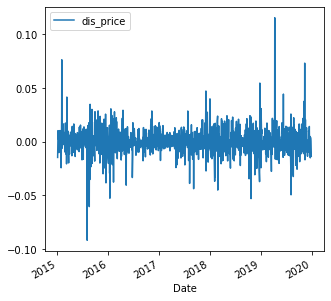

In [269]:
# Plot the daily returns of "dis" over the last 10 years
dis_df.plot(figsize=(5,5))

### Concatenation of the three stocks

In [242]:
custom_daily_returns_df = pd.concat([tsla_df, goog_df, dis_df], axis='columns', join ="inner")
custom_daily_returns_df.head()

,tsla_price,goog_price,dis_price
Date,,,
2015-05-22,0.115016,-0.004423,-0.001178
2015-05-26,-0.010724,-0.014439,-0.007437
2015-05-27,-0.065041,0.013899,0.008498
2015-05-28,-0.014493,0.000000,0.001450
2015-05-29,-0.014706,-0.014079,-0.001448


## Calculate Daily Portfolio Returns( Custom Portfolio)

In [247]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.33, 0.33, 0.34]

portfolio_returns = custom_daily_returns_df.dot(weights)
portfolio_returns.head()

Date
2015-05-22    0.036095
2015-05-26   -0.010832
2015-05-27   -0.013987
2015-05-28   -0.004290
2015-05-29   -0.009991
dtype: float64

## Plot Daily Portfolio Returns

<AxesSubplot:xlabel='Date'>

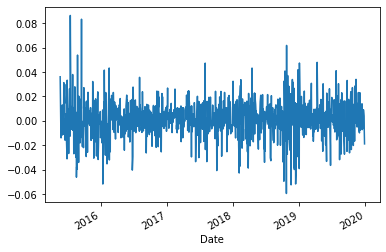

In [248]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_returns.plot()

## Calculate Cumulative Portfolio Returns

In [249]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

Date
2015-05-22    0.036095
2015-05-26    0.024872
2015-05-27    0.010537
2015-05-28    0.006202
2015-05-29   -0.003852
dtype: float64

In [250]:
cumulative_returns.tail()

Date
2019-12-20    2.756015
2019-12-23    2.732288
2019-12-24    2.766113
2019-12-27    2.780931
2019-12-30    2.709407
dtype: float64

## Plot Cumulative Portfolio Returns

<AxesSubplot:xlabel='Date'>

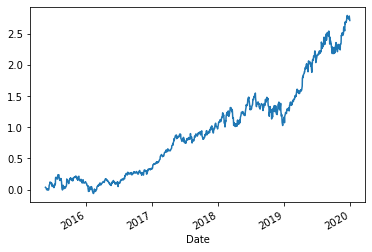

In [251]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.plot()

## Add your portfolio returns to the DataFrame with the other portfolios.


### Run the following analyses:

#### Calculate the Annualized Standard Deviation.
#### Calculate and plot rolling std with a 21-day window.
#### Calculate and plot the correlation.
#### Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.
#### Calculate the Sharpe ratios and generate a bar plot.



### How does your portfolio do?

In [400]:
#Custom portfolio_return_DF(CPR)
portfolio_returns


Date
2015-05-22    0.036095
2015-05-26   -0.010832
2015-05-27   -0.013987
2015-05-28   -0.004290
2015-05-29   -0.009991
                ...   
2019-12-20   -0.001714
2019-12-23   -0.006317
2019-12-24    0.009063
2019-12-27    0.003935
2019-12-30   -0.018917
Length: 1134, dtype: float64

In [519]:
sp_tsx_history_df.head()

,S&P TSX 60
Date,
2012-10-02,NaN
2012-10-03,-2.506943
2012-10-04,-3.784530
2012-10-05,-1.322942
2012-10-09,4.080375


In [539]:
Custom_Portfolio_df= combined_df.copy()
Custom_Portfolio_df= pd.concat([portfolio_return_df, sp_tsx_history_df], axis='columns', join ="inner")
Custom_Portfolio_df.head()

,0,S&P TSX 60
Date,,
2015-05-22,0.036095,-1.021605
2015-05-26,-0.010832,9.232796
2015-05-27,-0.013987,-1.440746
2015-05-28,-0.004290,-1.057933
2015-05-29,-0.009991,25.781366


In [541]:
# Rename the columns to match the corresponding stock
combined_df.columns = ['CP', 'SP60']
combined_df.head()

,CP,SP60
Date,,
2015-05-22,0.036095,-1.021605
2015-05-26,-0.010832,9.232796
2015-05-27,-0.013987,-1.440746
2015-05-28,-0.004290,-1.057933
2015-05-29,-0.009991,25.781366


# Calculation of Std dev., Annualized Standard Deviation, Correlation

In [542]:
Std_dev_of_each_portfolio = combined_df.std()
print(Std_dev_of_each_portfolio)

CP        0.014835
SP60    206.716150
dtype: float64


In [543]:
Correlation = Custom_Portfolio_df.corr()
Correlation

,0,S&P TSX 60
0,1.000000,-0.008294
S&P TSX 60,-0.008294,1.000000


<AxesSubplot:>

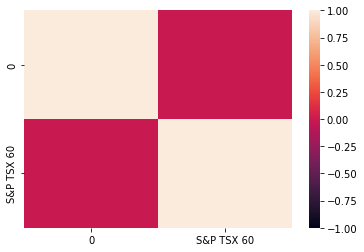

In [544]:
sns.heatmap(Correlation, vmin=-1, vmax=1)

In [545]:

answer= combined_df.std()
print("The standard deviations of the 2 columns are:")
print (answer)

The standard deviations of the 2 columns are:
CP        0.014835
SP60    206.716150
dtype: float64


## # Calculate the annualized standard deviation (252 trading days)

In [546]:
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std

CP         0.235498
SP60    3281.517143
dtype: float64

<AxesSubplot:xlabel='Date'>

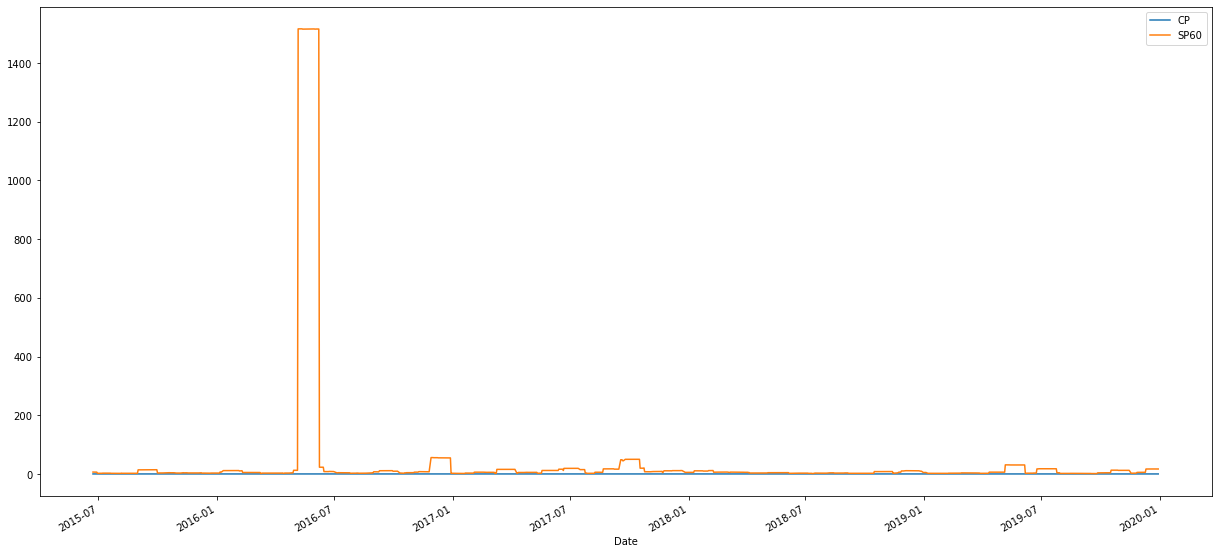

In [547]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
combined_df.rolling(window=21).std().plot(figsize=(21,10))

## Calculate Variance of CP Returns

In [550]:
# Calculate variance of the CP
variance = combined_df.var()
variance

CP          0.000220
SP60    42731.566516
dtype: float64

In [551]:
# Calculate Variance of SP60 Returns

In [552]:
# Calculate variance of the SP60
variance = sp_tsx_history_df['S&P TSX 60'] .var()
variance

27452.416047576586

## Calculate Covariance of CP returns vs. S&P60 returns

In [553]:
#df = pd.DataFrame
#df.cov()

combined_df.cov()

,CP,SP60
CP,0.000220,-0.025433
SP60,-0.025433,42731.566516


## Plot Price Relationships

<AxesSubplot:xlabel='CP', ylabel='SP60'>

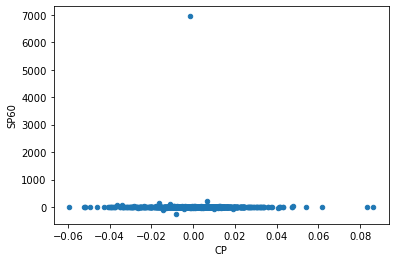

In [554]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='CP', y='SP60')

## Calculate Correlation of Prices

In [555]:
# Calculate the correlation of closing prices between MSFT and SP500
price_correlation = combined_df.corr()
price_correlation 

,CP,SP60
CP,1.000000,-0.008294
SP60,-0.008294,1.000000


## Plot Correlation of Prices

<AxesSubplot:>

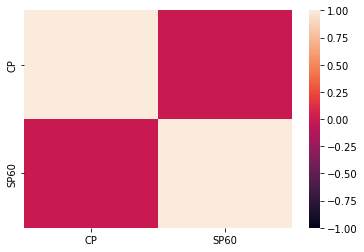

In [556]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=-1, vmax=1)

## Calculate Daily Returns

## Plot Daily Return Trends

<AxesSubplot:xlabel='Date'>

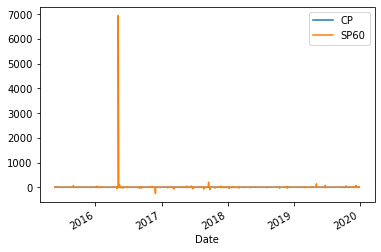

In [557]:
# Plot the daily returns of Custom_Portfolio and SP500
combined_df.plot()

## Plot Daily Return Relationships

<AxesSubplot:xlabel='CP', ylabel='SP60'>

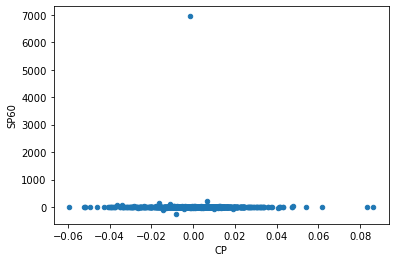

In [558]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='CP', y='SP60')

In [560]:
# Calculate covariance of all daily returns of CP vs. S&P TSX 60
covariance = combined_df['CP'].cov(sp_tsx_history_df['S&P TSX 60'] )
covariance

-0.025433217425796024

## Beta of all daily returns of 'CP'

In [561]:
# Calculate beta of all daily returns of CP
CP_beta = covariance / variance
#CP_beta
combined_df

,CP,SP60
Date,,
2015-05-22,0.036095,-1.021605
2015-05-26,-0.010832,9.232796
2015-05-27,-0.013987,-1.440746
2015-05-28,-0.004290,-1.057933
2015-05-29,-0.009991,25.781366
...,...,...
2019-12-20,-0.001714,0.693630
2019-12-23,-0.006317,-0.811813
2019-12-24,0.009063,4.005760


## 30-day rolling covariance of CP vs. S&P TSX 60 and plot the data

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of CP Returns vs. SP60 Returns'}, xlabel='Date'>

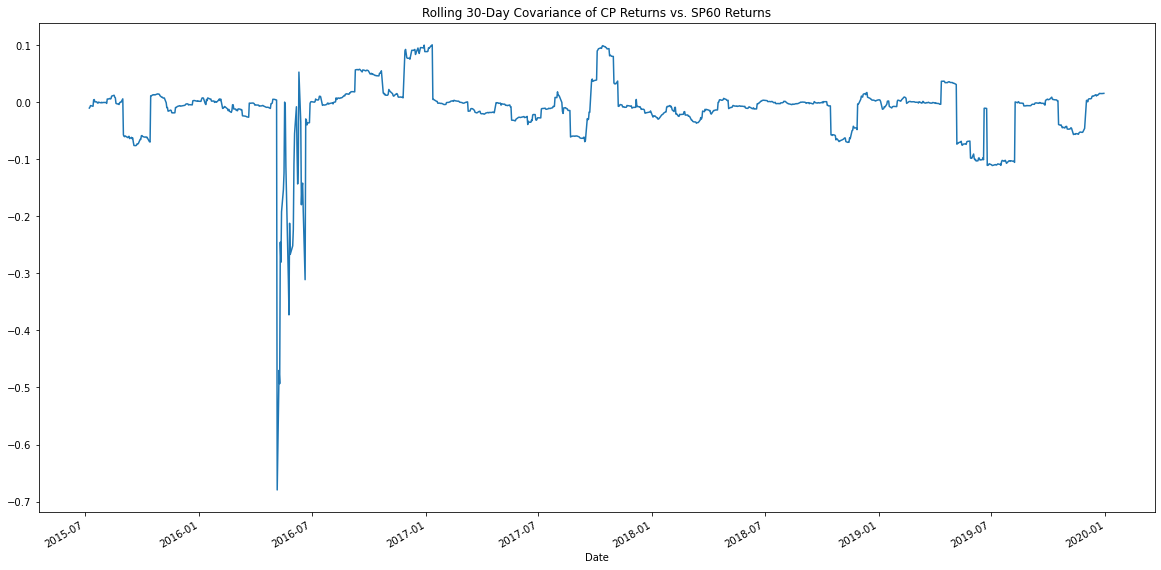

In [565]:
# Calculate 30-day rolling covariance of CP vs. S&P TSX 60 and plot the data
rolling_covariance = combined_df['CP'].rolling(window=30).cov(combined_df['SP60'] )
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of CP Returns vs. SP60 Returns')

## Calculate 30-Day Rolling Variance of S&P TSX 60 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

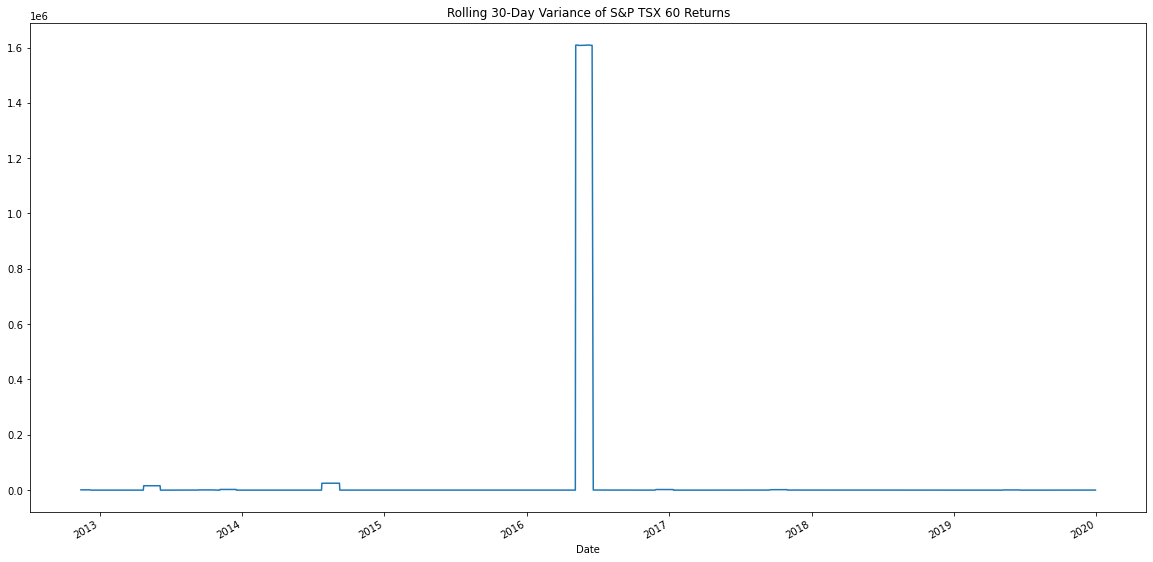

In [566]:
# Calculate 30-day rolling variance of CP vs. S&P TSX 60 and plot the data
rolling_variance = sp_tsx_history_df['S&P TSX 60'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

## Calculate 30-Day Rolling Beta of CP

<AxesSubplot:title={'center':'Rolling 30-Day Beta of CP'}, xlabel='Date'>

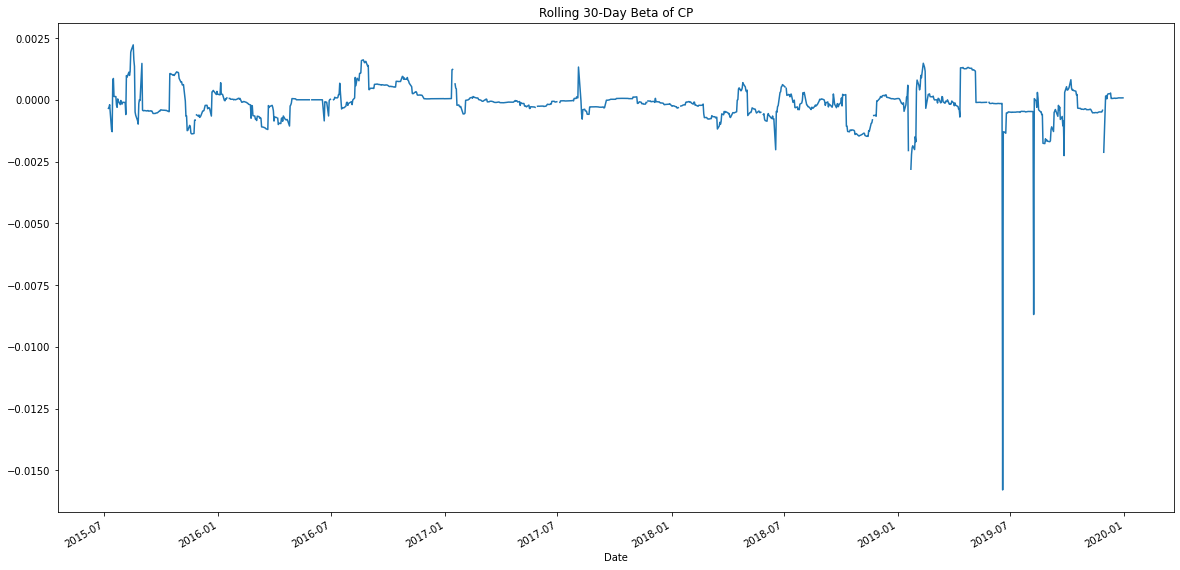

In [567]:
# Calculate 30-day rolling beta of CP and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of CP')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of CP'}, xlabel='Date'>

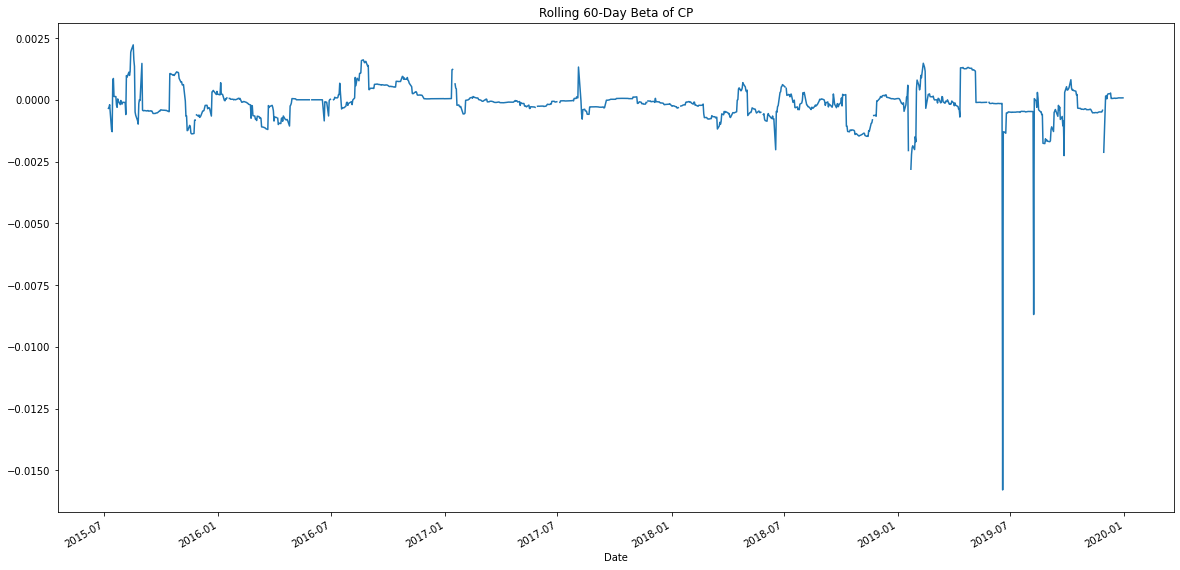

In [568]:
# Calculate 60-day rolling beta of CP and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of CP')

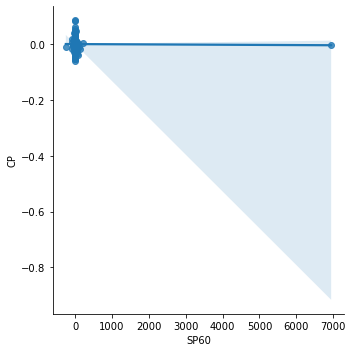

In [574]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='SP600', y='CP', data=combined_df, aspect=1.5, fit_reg=True)

In [512]:
# The Sharpe ratio is a measure of return often used to compare the performance of investment managers by making an 
# adjustment for risk. Generally speaking, a Sharpe ratio between 1 and 2 is considered good. 
# A ratio between 2 and 3 is very good, and any result higher than 3 is excellent.

# Calculate sharpe ratio
# Refer to markdown for Analysis of Sharp Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

CP      1.355190
SP60    0.415589
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

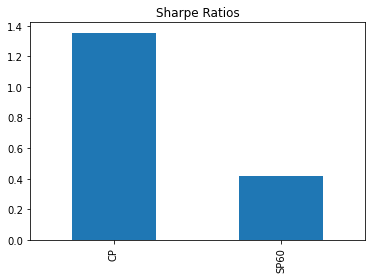

In [515]:
# This gives an impression of how volatile the portfolio is. The more data is centered around 0.0, 
#the less volatile and risky.

# Plot sharpe ratios using a bar chart
sharpe_ratios.plot.bar(title="Sharpe Ratios")

## COMMENT

## The Sharpe ratio Custom Portfolio(CP) made up of Tesla Inc (TSLA • NASDAQ), Alphabet Inc Class C (GOOG • NASDAQ) AND Walt Disney Co (DIS • NYSE) is much higher at 135.5% compared with S&P TSX 60 at 41.6%. The implication of this is that Custom Portfolio gives higher expected returns relative to the risk inherent in the portfolio as measured by the standard deviation.

## Customs stocks are more attractive and will be a toast of investors/investment managers relative to the market volatility as expressed by standard deviation and by extension, the variance and covariance of the portfolio. The Custom Portfolio stocks in the right proportion(equal) outperform the  S&P TSX 60 yield relative to risk. The Custom Srocks  are therefore highly recommended.